In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold
import seaborn as sns

In [2]:
dm = pd.read_csv('genePresenceAbsence.csv',index_col = 0)
#dm = pd.read_csv('distanceMatrixFromTree.csv',sep=';')
lineage = pd.read_csv('lineages.csv',sep='\t', index_col = 0)

In [3]:
dmT = dm.T
dmT

Gene,comEC,spoT,pqiB,group_101,orn,queA,murU,tyrS,ileS,cbbZC,...,group_3839,group_3840,group_3841,group_3842,group_3843,group_3844,group_3845,group_3846,group_3847,group_3848
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27228,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
61381,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,0,0


In [4]:
lineage

,lineage
ID,
13685,1
27228,1
31457,1
31458,1
31459,1
...,...
61340,0
61341,0
61380,0


In [5]:
lineage = lineage.set_index(dmT.index)
lineage

,lineage
13685,1
27228,1
2855,1
31457,1
31458,1
...,...
61379,0
61380,0
61381,0
61382,0


In [6]:
dmlin = pd.merge(dmT,lineage,left_index=True,right_index=True)
dmlin

,comEC,spoT,pqiB,group_101,orn,queA,murU,tyrS,ileS,cbbZC,...,group_3840,group_3841,group_3842,group_3843,group_3844,group_3845,group_3846,group_3847,group_3848,lineage
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
27228,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
61381,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,0,0,0


In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dmlin, test_size = 0.2)
train

,13685,27228,31457,31458,31459,31460,31461,31462,31463,31464,...,32009,32010,32076,46275,61340,61341,61380,61382,61383,lineage
31726,0.005292,0.111963,0.010222,0.009735,0.005870,0.008034,0.004687,0.006142,0.005766,0.005965,...,0.005370,0.009200,0.006603,0.006947,0.009007,0.007818,0.005223,0.007253,0.007098,1
31655,0.005910,0.111182,0.009894,0.009159,0.007085,0.008748,0.006057,0.004832,0.006558,0.005392,...,0.005647,0.008489,0.006431,0.007271,0.008716,0.007026,0.005126,0.006675,0.006586,0
61342,0.004616,0.111408,0.009328,0.008487,0.006102,0.007773,0.005136,0.004586,0.005508,0.004722,...,0.005013,0.007938,0.005382,0.006447,0.008535,0.006443,0.003766,0.006480,0.006277,1
31971,0.004460,0.111894,0.009831,0.010501,0.006159,0.007906,0.001512,0.006314,0.005789,0.006741,...,0.005520,0.009721,0.007040,0.007541,0.009346,0.007999,0.005854,0.007794,0.007550,1
31489,0.007623,0.112598,0.009365,0.011294,0.009124,0.010798,0.007979,0.006658,0.008523,0.007513,...,0.006681,0.010153,0.006041,0.007104,0.009320,0.007309,0.006202,0.003431,0.003879,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31576,0.005958,0.109294,0.008353,0.011157,0.009198,0.011023,0.007496,0.005982,0.008784,0.007541,...,0.006056,0.010024,0.007376,0.007391,0.011428,0.009495,0.007860,0.009295,0.009121,1
31724,0.007635,0.111806,0.009930,0.010853,0.009300,0.009983,0.008208,0.005919,0.008767,0.007073,...,0.007234,0.010386,0.007333,0.007415,0.011326,0.009163,0.007721,0.008470,0.008311,1
31503,0.008829,0.113853,0.010619,0.012029,0.009797,0.011472,0.009154,0.007888,0.008229,0.008245,...,0.007891,0.011257,0.007747,0.008320,0.010802,0.008725,0.007350,0.006073,0.006613,1
27228,0.109659,0.000000,0.111064,0.110942,0.113310,0.110482,0.111610,0.110555,0.113092,0.111829,...,0.109996,0.115553,0.111264,0.111995,0.111758,0.113022,0.112344,0.113572,0.113599,1


In [61]:
X_train = train.iloc[:,:-1].to_numpy()
X_test = test.iloc[:,:-1].to_numpy()

In [62]:
y_train = train['lineage'].to_numpy()

y_test = test['lineage'].to_numpy()

In [63]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=3)

In [64]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[ 7, 15],
       [11, 51]])

In [65]:

neigh.score(X_test, y_test, sample_weight=None)

0.6904761904761905

In [67]:
#Cross Validation KNN
from sklearn.model_selection import cross_val_score
#Cross Validation
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

Xf = dmlin.iloc[:,:-1].to_numpy()
yf= dmlin['lineage'].to_numpy()
#Cross Validation
scores = cross_val_score(neigh, Xf, yf, cv=cv,scoring='accuracy')
scores.mean()

0.7422764227642277

In [68]:
#SVM
linear_svc = SVC(kernel='rbf')
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)


array([[ 0, 22],
       [ 0, 62]])

In [69]:
metrics.accuracy_score(y_test, y_pred)

0.7380952380952381

In [70]:
#Cross Validation SVM
from sklearn.model_selection import cross_val_score

Xf = dmlin.iloc[:,:-1].to_numpy()
yf= dmlin['lineage'].to_numpy()
#Cross Validation
scores = cross_val_score(linear_svc, Xf, yf, cv=cv,scoring='accuracy')
scores.mean()

0.7111498257839721

In [71]:
#Cross Validation Logistic Regression
from sklearn.model_selection import cross_val_score
lg = LogisticRegression(penalty ='l2')
Xf = dmlin.iloc[:,:-1].to_numpy()
yf= dmlin['lineage'].to_numpy()
#Cross Validation
scores = cross_val_score(lg, Xf, yf, cv=cv,scoring='accuracy')
scores.mean()

0.7159117305458769

In [72]:
gene = pd.read_csv('geneRankedSVM_normalized.csv')
scoary_gene = pd.read_csv('ScoaryFirst280.csv')
gene = gene.set_index('Unnamed: 0')
scoary_gene = scoary_gene.set_index('Unnamed: 0')

In [73]:
scoary_gene_filt =scoary_gene.filter(gene.columns)

In [74]:
scoary_gene_filt
#gene = gene.drop(columns=['lineage'])

,group_966,group_1866,group_625,group_1710,group_1856,tbpB_2,group_2005,group_606,group_636,group_829,...,group_2104,group_2316,group_20,group_53,group_1163,group_2383,group_887,group_2414,group_181,group_1528
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2855,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,1,1,0,1,1,0
13685,0,1,0,1,1,1,1,0,0,1,...,1,0,0,1,1,0,1,0,0,0
27228,0,1,0,1,1,1,0,1,0,1,...,1,1,0,1,1,1,1,0,1,0
31457,0,1,0,0,1,1,0,0,0,1,...,1,0,0,1,1,1,0,1,1,0
31458,0,1,0,1,1,0,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0,1,0,1,1,0,0,0,0,1,...,1,1,0,1,1,0,1,0,0,0
61380,0,1,0,0,1,1,1,1,1,1,...,1,1,0,1,1,1,0,0,0,0
61381,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [75]:
gene = gene.div(gene.sum(axis=1), axis=0)
scoary_gene_filt = scoary_gene_filt.div(scoary_gene_filt.sum(axis=1), axis=0)
scoary_gene_filt

,group_966,group_1866,group_625,group_1710,group_1856,tbpB_2,group_2005,group_606,group_636,group_829,...,group_2104,group_2316,group_20,group_53,group_1163,group_2383,group_887,group_2414,group_181,group_1528
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2855,0.0,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,...,0.090909,0.090909,0.0,0.000000,0.090909,0.090909,0.000000,0.090909,0.090909,0.000000
13685,0.0,0.071429,0.0,0.071429,0.071429,0.071429,0.071429,0.000000,0.000000,0.071429,...,0.071429,0.000000,0.0,0.071429,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000
27228,0.0,0.062500,0.0,0.062500,0.062500,0.062500,0.000000,0.062500,0.000000,0.062500,...,0.062500,0.062500,0.0,0.062500,0.062500,0.062500,0.062500,0.000000,0.062500,0.000000
31457,0.0,0.066667,0.0,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.066667,...,0.066667,0.000000,0.0,0.066667,0.066667,0.066667,0.000000,0.066667,0.066667,0.000000
31458,0.0,0.076923,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.076923,0.000000,0.0,0.076923,0.076923,0.000000,0.076923,0.000000,0.076923,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,0.0,0.076923,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.076923,0.076923,0.0,0.076923,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000
61380,0.0,0.066667,0.0,0.000000,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.066667,0.066667,0.0,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000
61381,0.0,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,...,0.125000,0.000000,0.0,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000


In [76]:
gene.index.name = 'ID' 

In [77]:
gene = gene.set_index(dm.index)
scoary_gene_filt = scoary_gene_filt.set_index(dm.index)

In [78]:
X = gene.join(dmlin)
Xscoary = scoary_gene_filt.join(dmlin)

In [79]:
X

,group_1918,group_108,group_966,group_1866,ptlG,group_625,group_1710,group_2110,group_1856,group_1512,...,32009,32010,32076,46275,61340,61341,61380,61382,61383,lineage
13685,0.000000,0.052632,0.000000,0.000000,0.000000,0.0,0.000000,0.052632,0.000000,0.000000,...,0.004973,0.009382,0.005724,0.006494,0.009208,0.007125,0.005470,0.007329,0.006988,1
27228,0.041667,0.041667,0.000000,0.041667,0.000000,0.0,0.041667,0.041667,0.041667,0.000000,...,0.109996,0.115553,0.111264,0.111995,0.111758,0.113022,0.112344,0.113572,0.113599,1
31457,0.035714,0.035714,0.000000,0.035714,0.000000,0.0,0.035714,0.035714,0.035714,0.000000,...,0.009156,0.013436,0.008278,0.008881,0.013051,0.010123,0.009361,0.010055,0.010178,1
31458,0.037037,0.037037,0.000000,0.037037,0.000000,0.0,0.000000,0.000000,0.037037,0.000000,...,0.009711,0.013163,0.010166,0.010739,0.014097,0.011518,0.009799,0.011207,0.010985,1
31459,0.045455,0.045455,0.000000,0.045455,0.000000,0.0,0.045455,0.045455,0.045455,0.000000,...,0.006285,0.010214,0.007308,0.008159,0.010229,0.008740,0.006975,0.008659,0.008460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,0.000000,0.000000,0.000000,0.055556,0.000000,0.0,0.055556,0.000000,0.055556,0.000000,...,0.008659,0.012568,0.009890,0.008700,0.000000,0.009260,0.008541,0.009698,0.009876,0
61341,0.034483,0.034483,0.000000,0.034483,0.000000,0.0,0.000000,0.034483,0.034483,0.000000,...,0.007033,0.010673,0.007808,0.006344,0.009260,0.000000,0.007089,0.007143,0.007374,0
61380,0.055556,0.055556,0.000000,0.000000,0.055556,0.0,0.055556,0.000000,0.000000,0.055556,...,0.005833,0.008537,0.005452,0.006393,0.008541,0.007089,0.000000,0.006182,0.005785,0
61382,0.000000,0.043478,0.043478,0.000000,0.043478,0.0,0.000000,0.000000,0.000000,0.043478,...,0.006954,0.010205,0.006713,0.007085,0.009698,0.007143,0.006182,0.000000,0.002315,0


In [80]:
trainf, testf = train_test_split(X, test_size = 0.2)
X_trainf = trainf.iloc[:,:-1].to_numpy()


X_testf = testf.iloc[:,:-1].to_numpy()


y_trainf = trainf['lineage'].to_numpy()
y_testf = testf['lineage'].to_numpy()

In [81]:
#SVM train con le feature selezionate
svc = SVC(kernel='rbf')
svc.fit(X_trainf, y_trainf)

y_predf = svc.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)


array([[ 2, 24],
       [ 0, 58]])

In [82]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [83]:
metrics.accuracy_score(y_testf, y_predf)

0.7142857142857143

In [84]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty ='l2').fit(X_trainf, y_trainf)
y_predf = lr.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)

array([[ 0, 26],
       [ 0, 58]])

In [85]:
metrics.accuracy_score(y_testf, y_predf)

0.6904761904761905

In [86]:
listA = dmlin[dmlin['lineage']==1]
listB = dmlin[dmlin['lineage']==0]

In [87]:
#Hierarchical clustring on distanceMatrix dm
from sklearn.cluster import AgglomerativeClustering

In [89]:
dm.to_numpy()

array([[0.        , 0.10965853, 0.00734607, ..., 0.00546955, 0.00732884,
        0.0069875 ],
       [0.10965853, 0.        , 0.11106407, ..., 0.11234407, 0.11357156,
        0.11359946],
       [0.00734607, 0.11106407, 0.        , ..., 0.00936125, 0.01005459,
        0.01017849],
       ...,
       [0.00546955, 0.11234407, 0.00936125, ..., 0.        , 0.00618176,
        0.00578545],
       [0.00732884, 0.11357156, 0.01005459, ..., 0.00618176, 0.        ,
        0.00231467],
       [0.0069875 , 0.11359946, 0.01017849, ..., 0.00578545, 0.00231467,
        0.        ]])

In [90]:
clustering = AgglomerativeClustering( linkage="average",compute_distances=True).fit(dm)

/home/lf481323/.conda/envs/pan_env/lib/python3.6/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [23]:
import seaborn as sns
sns.set_theme(color_codes=True)

In [23]:
lin_list = lineage['lineage'].to_list()

In [24]:
lut = dict(zip(lineage['lineage'].unique(), "rbg"))
row_colors =  lineage['lineage'].map(lut)

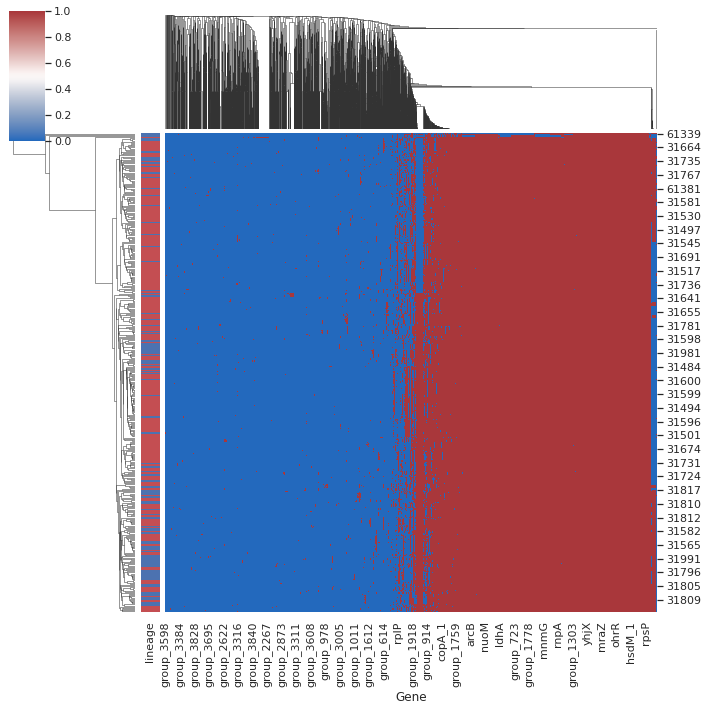

In [57]:
#metric="chebyshev"
g = sns.clustermap(dmT, row_colors=row_colors, metric="dice",cmap="vlag")

In [59]:
dmT

Gene,comEC,spoT,pqiB,group_101,orn,queA,murU,tyrS,ileS,cbbZC,...,group_3839,group_3840,group_3841,group_3842,group_3843,group_3844,group_3845,group_3846,group_3847,group_3848
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27228,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
61381,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,0,0


In [7]:
def get_total(dataframe):
    '''Return the total sum of each numerical attribute of a pandas.Dataframe.'''
    return dataframe.sum(axis=1)
def df_row_normalize(dataframe):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each line.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    return dataframe.div(dataframe.sum(axis=1), axis=0)

In [8]:
stat = pd.read_csv("dm_statistics.csv")
stat.columns

Index(['Gene', 'Unnamed: 0', 'Count', 'Mean', 'Std', 'q1', 'q2', 'q3', 'q4',
       'A', 'B'],
      dtype='object')

In [9]:
linA_genes = pd.read_csv('lineage_11_10_2021_1536.results.csv')

In [23]:
filt_linA = linA_genes[linA_genes['Benjamini_H_p'] < 0.01].sort_values(by=['Benjamini_H_p'])[:30]
filt_linA

,Gene,Non-unique Gene name,Annotation,Number_pos_present_in,Number_neg_present_in,Number_pos_not_present_in,Number_neg_not_present_in,Sensitivity,Specificity,Odds_ratio,Naive_p,Bonferroni_p,Benjamini_H_p,Max_Pairwise_comparisons,Max_supporting_pairs,Max_opposing_pairs,Best_pairwise_comp_p,Worst_pairwise_comp_p
0,group_1024,NaN,Phosphoribosyl transferase domain protein,269,28,29,93,90.268456,76.859504,30.809113,1.492311e-41,5.254428e-38,1.751476e-38,14,13,4,0.001831,0.179565
1,group_1706,NaN,hypothetical protein,269,28,29,93,90.268456,76.859504,30.809113,1.492311e-41,5.254428e-38,1.751476e-38,14,13,4,0.001831,0.179565
2,group_1483,NaN,hypothetical protein,29,93,269,28,9.731544,23.140496,0.032458,1.492311e-41,5.254428e-38,1.751476e-38,14,4,13,0.001831,0.179565
3,group_2315,NaN,hypothetical protein,51,97,247,24,17.114094,19.834711,0.051087,2.464226e-34,8.676538e-31,2.169135e-31,16,5,13,0.021271,0.210114
4,group_2283,NaN,hypothetical protein,38,87,260,34,12.751678,28.099174,0.057118,6.944336e-32,2.445101e-28,4.890201e-29,10,5,6,0.753906,1.000000
5,group_2316,NaN,Peptidase S24-like protein,58,97,240,24,19.463087,19.834711,0.059794,1.593940e-31,5.612264e-28,9.029041e-29,16,6,12,0.076813,0.454498
6,group_410,NaN,DNA methylase,296,67,2,54,99.328859,44.628099,119.283582,2.051472e-31,7.223233e-28,9.029041e-29,9,9,1,0.003906,0.039062
7,group_789,NaN,Endonuclease domain protein,296,67,2,54,99.328859,44.628099,119.283582,2.051472e-31,7.223233e-28,9.029041e-29,9,9,1,0.003906,0.039062
8,group_948,NaN,AAA ATPase domain protein,10,62,288,59,3.355705,48.760331,0.033042,1.586859e-29,5.587332e-26,5.079393e-27,12,4,9,0.145996,0.387695
9,aplIM_2,NaN,Modification methylase AplI,288,59,10,62,96.644295,51.239669,30.264407,1.586859e-29,5.587332e-26,5.079393e-27,12,9,4,0.145996,0.387695


In [31]:
filt = filt_linA['Gene'].to_list()
len(filt)

30

In [32]:
stat = stat[['Gene','A','B']]
stat['Total'] = get_total(stat)

/tmp/ipykernel_36273/959860640.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return dataframe.sum(axis=1)


In [35]:
stat

,Gene,A,B,Total
0,group_3200,3,0,3
1,group_1748,295,121,416
2,trxA,298,121,419
3,group_1352,293,121,414
4,group_1575,1,1,2
...,...,...,...,...
3128,group_628,137,71,208
3129,group_2614,71,23,94
3130,group_2033,161,82,243
3131,dnaQ,297,121,418


In [36]:
boolean_series = stat.Gene.isin(filt)
filtered_df = stat[stat['Gene'].isin(filt)]

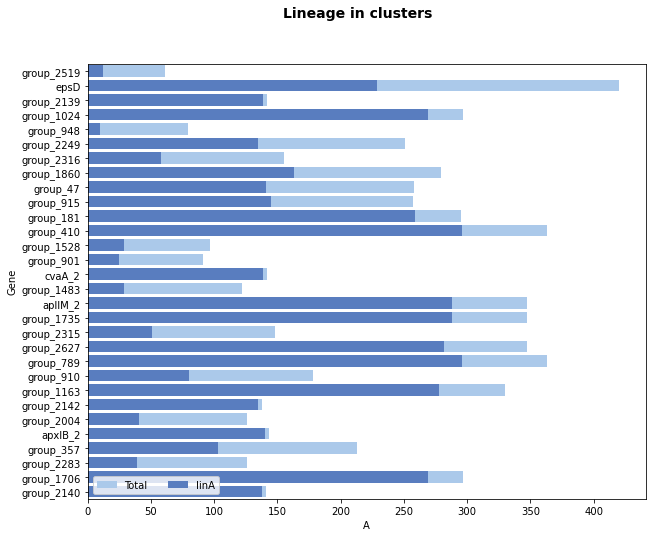

In [37]:
## Initialize the matplotlib figure:
 #Adjusting the space for the superior tit
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
## Plot the relative absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Gene", data=filtered_df, label="Total", color="b", ax=ax)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x="A", y="Gene", data=filtered_df, label="linA", color="b", ax=ax)
## Add a legend and informative axis label
ax.legend(ncol=2, loc="lower left", frameon=True)

plt.suptitle('Lineage in clusters', fontsize=14, fontweight='bold')

plt.show()